In [1]:
import matplotlib.pyplot as plt
from utilsCPD import *
from SWCPD import BaseDetector as SWDCP

In [2]:
import time as time
import zipfile
import json

zip_file_path = './datasets/MNISTSeq.zip'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_contents = zip_ref.namelist()
    json_file_name = zip_contents[0]
    with zip_ref.open(json_file_name) as json_file:
        data = json.load(json_file)

In [3]:
data_array = np.array(data['0']['data'],dtype=np.float32)
labels = data['0']['target']

In [4]:
p = 4
L = 1000
significance = 0.05
window_lenght = 50
lookback = window_lenght


detector = SWDCP(data_array,window_length=window_lenght,max_history=lookback,significance=significance)
detector.process_dataloader(n_theta=L,p=p,verbose=True)

 34%|███▍      | 187/551 [00:01<00:01, 183.05it/s]

Change detected at: 217 
Initiate new segment


 72%|███████▏  | 396/551 [00:02<00:00, 180.21it/s]

Change detected at: 420 
Initiate new segment


100%|██████████| 551/551 [00:03<00:00, 178.74it/s]


In [5]:
UPPER = detector.upper
CUSUM = detector.cumsum

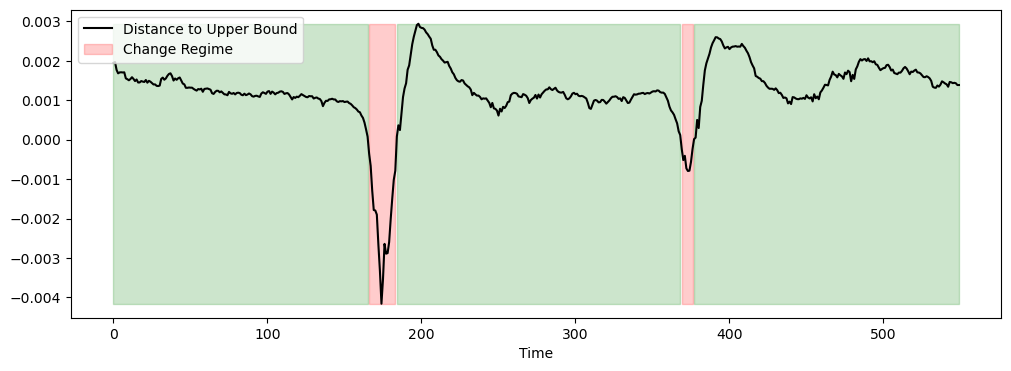

In [6]:
fig,ax = plt.subplots(figsize=(12,4))
t = np.arange(detector.data.shape[0]-window_lenght)
distance_upper = np.subtract(UPPER[:-1],CUSUM[1:])
ax.plot(t,distance_upper,color='black',label='Distance to Upper Bound')
ax.fill_between(t,min(distance_upper),max(distance_upper),where=(distance_upper>=0),color='green',alpha=0.2)
ax.fill_between(t,min(distance_upper),max(distance_upper),where=(distance_upper<0),color='red',alpha=0.2,label='Change Regime')
ax.set_xlabel('Time')
ax.legend(loc='upper left');

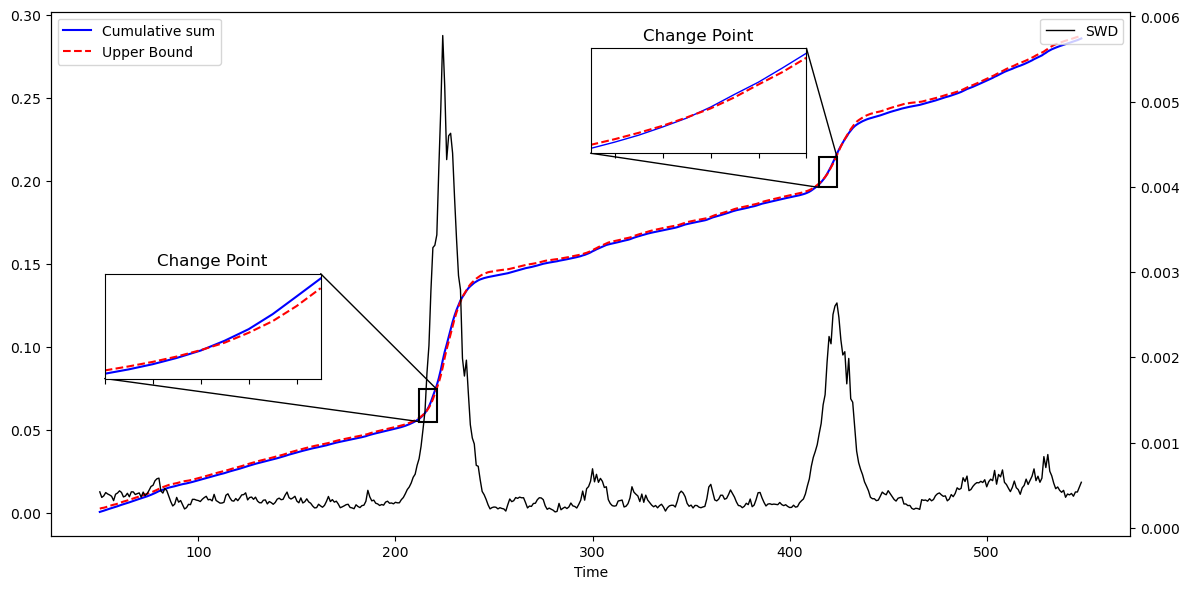

In [7]:
window_lenght = 50
end = 500
fig, axs = plt.subplots(1, 1, figsize=(12, 6))
t = np.arange(window_lenght,detector.data.shape[0]+window_lenght)[:end-1]

# First plot: Main figure

ax1 = axs
ax2 = ax1.twinx()
ax1.plot(t, CUSUM[1:end], label='Cumulative sum',color='blue')
ax1.plot(t, UPPER[:end-1], color='red', label='Upper Bound',ls='dashed')
ax2.plot(t, [detector.loss_segments[i].mean() for i in range(1,end)], color='black', lw=1.0, label='SWD')

# Labels and Legends
ax1.set_xlabel('Time')
ax1.legend()
ax2.legend(loc='upper right')


ax1_in = ax1.inset_axes([0.05, 0.3, 0.2, 0.2])

zoom_range = 5  
t_zoom = 217
zoom_start, zoom_end = t_zoom - zoom_range, t_zoom + zoom_range

ax1_in.plot(t[zoom_start-window_lenght:zoom_end-window_lenght], 
             CUSUM[zoom_start-window_lenght:zoom_end-window_lenght],color='blue')
ax1_in.plot(t[zoom_start-window_lenght:zoom_end-window_lenght], 
             UPPER[zoom_start-window_lenght-1:zoom_end-window_lenght-1], 
             color='red',linestyle='dashed')
ax1_in.set_xlim(zoom_start,zoom_end-1)
ax1_in.plot()
ax1_in.set_xticklabels([])
ax1_in.set_yticks([])
ax1_in.set_title('Change Point')

ax1.indicate_inset_zoom(ax1_in,lw=1.5,edgecolor='black',alpha=1.0)



ax2_in = ax1.inset_axes([0.5, 0.73, 0.2, 0.2])

zoom_range = 5  
t_zoom = 420
zoom_start, zoom_end = t_zoom - zoom_range, t_zoom + zoom_range

ax2_in.plot(t[zoom_start-window_lenght:zoom_end-window_lenght], 
             CUSUM[zoom_start-window_lenght:zoom_end-window_lenght],lw=1,color='blue')
ax2_in.plot(t[zoom_start-window_lenght:zoom_end-window_lenght], 
             UPPER[zoom_start-window_lenght-1:zoom_end-window_lenght-1], 
             color='red',linestyle='dashed')
ax2_in.set_xlim(zoom_start,zoom_end-1)
ax2_in.plot()
ax2_in.set_title('Change Point')
ax2_in.set_xticklabels([])
ax2_in.set_yticks([])
ax1.indicate_inset_zoom(ax2_in,lw=1.5,edgecolor='black',alpha=1.0)

fig.tight_layout()

#fig.savefig('UpperBoundZoom.pdf')